In [16]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Titanic Dataset
df = pd.read_csv('Titanic Dataset.csv')

In [17]:
import warnings

warnings.filterwarnings('ignore')

# Step 3: Data Preprocessing
# Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'].fillna('S', inplace=True)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Step 4: Feature Selection
features = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex']]

# Step 5: Standardize the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

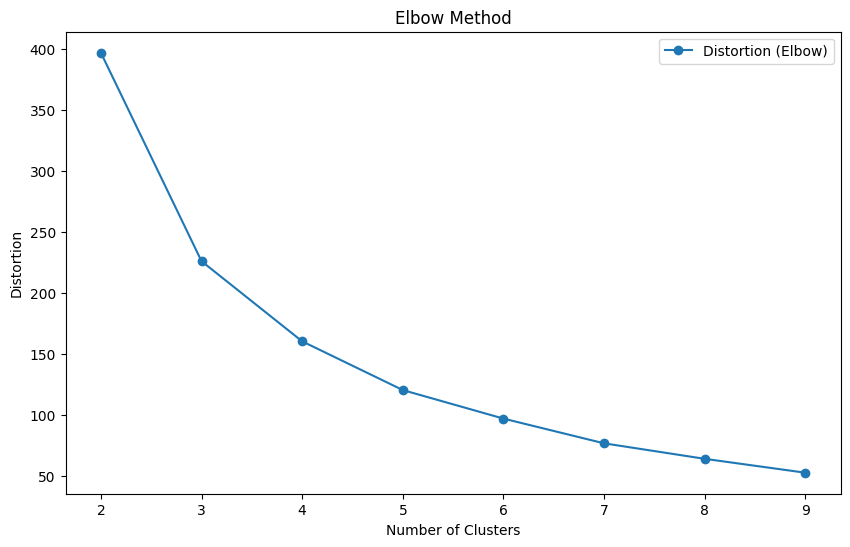

In [18]:
# Step 6: Hierarchical Clustering
linkage_matrix = linkage(scaled_features, method='ward')

# Step 7: Elbow Method to Determine Optimal Number of Clusters
# Compute the cophenetic correlation coefficient and distance matrix
c, coph_dists = cophenet(linkage_matrix, pdist(scaled_features))

# Calculate within-cluster distances for varying numbers of clusters
cluster_range = range(2, 10)
distortions = []

for k in cluster_range:
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    distortion = np.mean([np.linalg.norm(scaled_features[clusters == i] - scaled_features[clusters == i].mean(axis=0), axis=1).sum() for i in range(1, k+1)])
    distortions.append(distortion)

# Plot the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, distortions, marker='o', label='Distortion (Elbow)')
plt.xticks(cluster_range)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.legend()
plt.show()


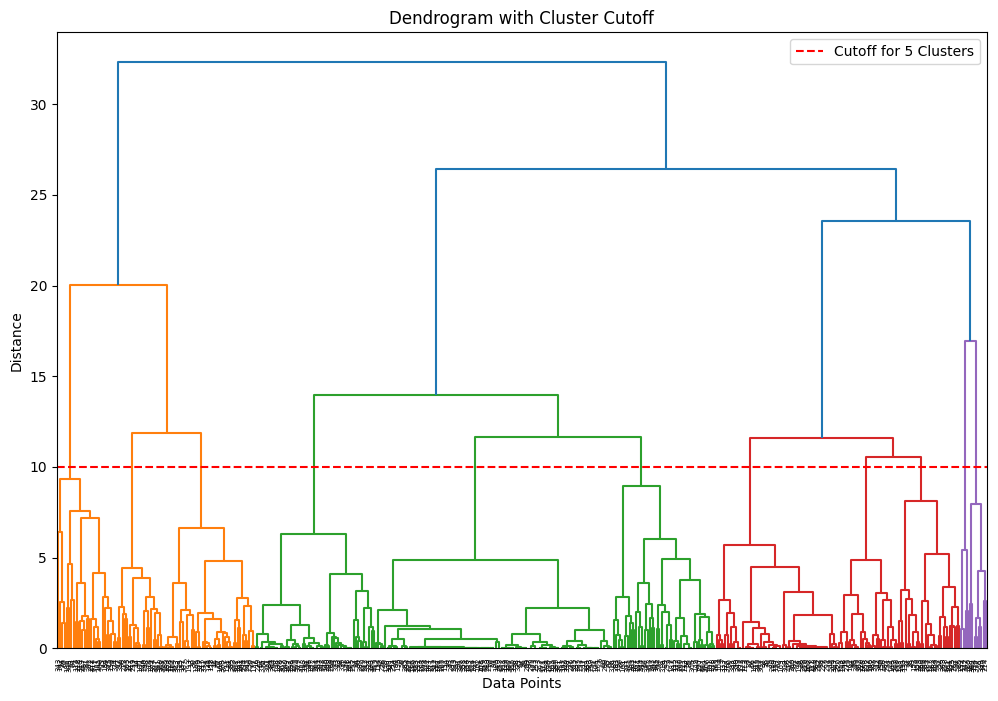

In [19]:
# Step 8: Dendrogram with Cutoff
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
optimal_cutoff = 5  # Example, adjust based on the elbow graph
plt.axhline(y=10, color='r', linestyle='--', label='Cutoff for {} Clusters'.format(optimal_cutoff))
plt.title('Dendrogram with Cluster Cutoff')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [20]:
# Step 9: Assign Cluster Labels
num_clusters = optimal_cutoff
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Display a sample of the dataset with cluster labels
print(df[['PassengerId', 'Cluster']].head())

   PassengerId  Cluster
0          892        3
1          893        4
2          894        2
3          895        3
4          896        4
